In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report
from sklearn.metrics import mean_absolute_error

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [2]:
df = pd.read_csv('Brain Tumor.csv')

In [3]:
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [4]:
df.columns

Index(['Image', 'Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness'],
      dtype='object')

In [5]:
df.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


In [6]:
df=df.iloc[1500:3500]

In [7]:
df.shape

(2000, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 1500 to 3499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               2000 non-null   object 
 1   Class               2000 non-null   int64  
 2   Mean                2000 non-null   float64
 3   Variance            2000 non-null   float64
 4   Standard Deviation  2000 non-null   float64
 5   Entropy             2000 non-null   float64
 6   Skewness            2000 non-null   float64
 7   Kurtosis            2000 non-null   float64
 8   Contrast            2000 non-null   float64
 9   Energy              2000 non-null   float64
 10  ASM                 2000 non-null   float64
 11  Homogeneity         2000 non-null   float64
 12  Dissimilarity       2000 non-null   float64
 13  Correlation         2000 non-null   float64
 14  Coarseness          2000 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 23

In [9]:
#  To find the missing values in every feature
df.isnull().sum()

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

In [10]:
s = df['Class']
s.value_counts()

1    1054
0     946
Name: Class, dtype: int64

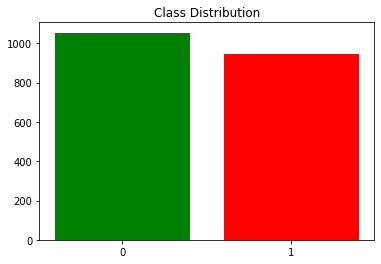

In [11]:
#frequency distribution for Class attribute

plt.bar(["0","1"],df['Class'].value_counts(),color = ['green','red'])
plt.title("Class Distribution")
plt.show()

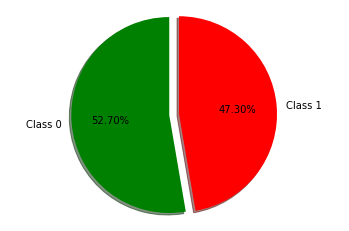

In [12]:
# Pie Chart for Class attribute

labels = 'Class 0' , 'Class 1'
explode = (0, 0.1)
mycolors = ["green","red"]

fig1, ax1 = plt.subplots()
ax1.pie(s.value_counts(), explode = explode ,labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90 ,colors = mycolors )
ax1.axis('equal')  

plt.show()

In [13]:
### Dropping Image attribute
df.drop('Image',axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 1500 to 3499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Class               2000 non-null   int64  
 1   Mean                2000 non-null   float64
 2   Variance            2000 non-null   float64
 3   Standard Deviation  2000 non-null   float64
 4   Entropy             2000 non-null   float64
 5   Skewness            2000 non-null   float64
 6   Kurtosis            2000 non-null   float64
 7   Contrast            2000 non-null   float64
 8   Energy              2000 non-null   float64
 9   ASM                 2000 non-null   float64
 10  Homogeneity         2000 non-null   float64
 11  Dissimilarity       2000 non-null   float64
 12  Correlation         2000 non-null   float64
 13  Coarseness          2000 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 218.9 KB


In [15]:
#Correlation Matrix

corr_m = df.corr()
corr_m.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)


,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
Class,1.00,-0.15,0.27,0.25,-0.81,0.43,0.24,0.22,-0.87,-0.80,-0.84,0.55,-0.11,nan
Mean,-0.15,1.00,0.77,0.78,-0.01,-0.61,-0.36,-0.04,0.08,-0.02,0.19,-0.16,0.28,nan
Variance,0.27,0.77,1.00,0.98,-0.30,-0.36,-0.25,0.18,-0.28,-0.30,-0.23,0.22,0.29,nan
Standard Deviation,0.25,0.78,0.98,1.00,-0.29,-0.43,-0.33,0.16,-0.27,-0.29,-0.22,0.21,0.34,nan
Entropy,-0.81,-0.01,-0.30,-0.29,1.00,-0.30,-0.18,-0.13,0.97,1.00,0.85,-0.50,0.13,nan
Skewness,0.43,-0.61,-0.36,-0.43,-0.30,1.00,0.89,0.31,-0.36,-0.29,-0.53,0.51,-0.55,nan
Kurtosis,0.24,-0.36,-0.25,-0.33,-0.18,0.89,1.00,0.24,-0.20,-0.18,-0.33,0.35,-0.58,nan
Contrast,0.22,-0.04,0.18,0.16,-0.13,0.31,0.24,1.00,-0.12,-0.13,-0.28,0.76,-0.42,nan
Energy,-0.87,0.08,-0.28,-0.27,0.97,-0.36,-0.20,-0.12,1.00,0.97,0.91,-0.54,0.13,nan
ASM,-0.80,-0.02,-0.30,-0.29,1.00,-0.29,-0.18,-0.13,0.97,1.00,0.84,-0.49,0.13,nan


## Data Transformation

### 1.  Handling Missing Values

In [16]:
# To find the missing values in every feature
df.isnull().sum()

Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

In [17]:
X = df.drop('Class',axis=1)   
y = df['Class']    

# Dimensionality Reduction

## 1. Feature Selection

In [18]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [19]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [20]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [21]:
featureScores

,Specs,Score
0,Mean,164.030199
1,Variance,45365.161287
2,Standard Deviation,373.614838
3,Entropy,84.575983
4,Skewness,655.887206
5,Kurtosis,18048.323534
6,Contrast,6971.362867
7,Energy,126.438492
8,ASM,68.924244
9,Homogeneity,49.589138


In [22]:
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(criterion ='gini')
model.fit(X,y)

ExtraTreesClassifier()

In [23]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01719307 0.01451225 0.01783607 0.24757902 0.04213663 0.02743253
 0.00946435 0.22650785 0.19657933 0.1674719  0.02541751 0.00786949
 0.        ]


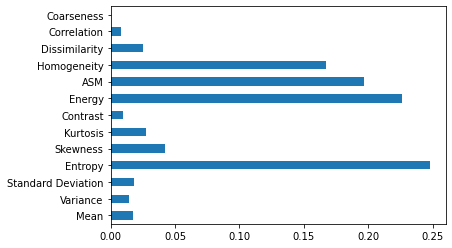

In [24]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

### Interpreting from the above two techniques , we come to the conclusion that the 'Coarseness' and 'Correlation' features do not affect the Class in any significant way. Hence we can drop the mentioned features.

In [25]:
X.drop(['Correlation', 'Coarseness'] , axis=1,inplace=True)

In [26]:
X.head(2)

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity
1500,3.206360,468.873313,21.653483,0.019710,7.065114,50.908319,241.563131,0.119869,0.014369,0.339681,6.739899
1501,13.859329,1507.506312,38.826619,0.015143,3.322031,11.674202,193.170732,0.104801,0.010983,0.382412,5.817073


### 2. Feature Extraction : Principal Component Analysis

In [27]:
X.shape

(2000, 11)

In [28]:
X2 = X.copy()

In [29]:
y2 = y.copy()

In [30]:
from sklearn.decomposition import PCA
plt.style.use('ggplot')
scaler = StandardScaler()
scaler.fit(X2)
X2 = scaler.transform(X2)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X2) # project the original data into the PCA space

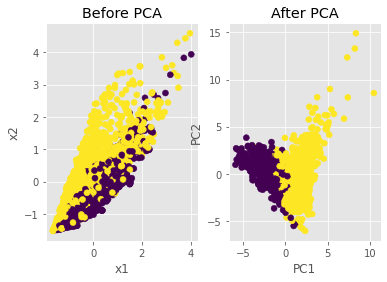

In [31]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X2[:,0], X2[:,1], c=y2)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y2)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [32]:
print(pca.explained_variance_ratio_)

[0.43818231 0.30624002]


In [33]:
print(abs( pca.components_ ))

[[0.04912253 0.1365075  0.12602448 0.41276482 0.2505613  0.18552567
  0.18767162 0.42197197 0.40918998 0.43430117 0.35519016]
 [0.47789575 0.47569246 0.49380531 0.08506547 0.40356977 0.34128778
  0.03265844 0.05486158 0.08803873 0.02116564 0.05129762]]


### Seeing the feature variance values showing their importances we can say that it would not be advisable to remove any more features as almost all of the 11 features have a very low value so it would become difficult to choose a threshold.

### Feature Normalization

In [34]:
### Holdout Method : Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [35]:
X_train.shape

(1600, 11)

In [36]:
X_test.shape

(400, 11)

In [37]:
y_train.shape

(1600,)

In [38]:
y_test.shape

(400,)

In [39]:
scaler=StandardScaler()
### fit vs fit_transform
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train) , columns =X.columns )

In [40]:
X_test_scaled=pd.DataFrame(scaler.transform(X_test) , columns =X.columns)

In [41]:
X_train_scaled.head()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity
0,-1.113501,-0.551708,-0.442242,-0.661552,1.017217,0.363105,1.227790,-0.504985,-0.662079,-0.953940,1.064415
1,-0.258414,-0.340648,-0.192571,2.361777,-0.313127,-0.228975,-0.552323,1.899091,2.432380,1.668605,-1.244358
2,0.738369,1.842127,1.645507,-0.949199,-0.244580,-0.202917,-0.036772,-1.186349,-0.919721,-1.529922,1.101538
3,-0.939068,-0.248552,-0.090580,-0.771359,0.750256,0.220571,1.053385,-0.697260,-0.762489,-0.515826,0.272824
4,0.265999,-0.289171,-0.135098,0.766022,-0.551154,-0.288294,-0.558672,0.902291,0.736038,0.778804,-0.741771


In [42]:
X_test_scaled.head()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity
0,0.365294,-0.656539,-0.576217,0.777741,-0.709728,-0.319299,-0.846402,0.909623,0.746377,0.825381,-0.969418
1,0.245143,0.022278,0.189878,-0.738128,-0.391746,-0.244041,-0.214934,-0.639417,-0.734573,-0.396964,0.024996
2,-0.475112,0.351709,0.499943,-0.963710,0.274737,-0.010131,0.737790,-1.267968,-0.932236,-1.667170,2.209628
3,0.398229,2.599485,2.128527,-0.897524,-0.025766,-0.135802,-0.341538,-0.994226,-0.874767,-0.945342,0.369480
4,-1.207492,-0.844892,-0.838735,-0.923252,1.226260,0.540653,0.439612,-1.079526,-0.897411,-1.521398,2.061715


In [43]:
y_train[0:5]

1500    1
2316    0
2290    1
1861    1
2092    0
Name: Class, dtype: int64

## Applying Algorithms on our scaled and transformed data

### 1. Naive Bayes Classifier

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       176
           1       0.99      0.95      0.97       224

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400

Naive Bayes Test Accuracy :  96.5 %
Training Accuracy:  96.875 %

TP Rate :  0.9464285714285714
TN Rate :  0.9886363636363636
FP Rate :  0.009345794392523364
FN Rate :  0.05357142857142857
Success Rate:  0.965
Misclassifiaction Rate:  0.035


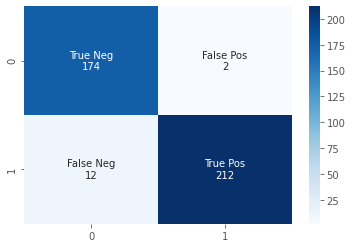

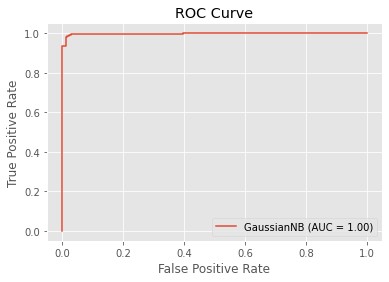

In [44]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

print(classification_report(y_test, y_pred_nb))

print('Naive Bayes Test Accuracy : ',accuracy_score(y_test, y_pred_nb)*100,'%')
print('Training Accuracy: ',accuracy_score(y_train, nb.predict(X_train_scaled))*100,'%')

cm_nb = confusion_matrix(y_test, y_pred_nb)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_nb.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_nb,annot=labels,fmt='',cmap = 'Blues')
print()

TP_nb = cm_nb[1][1]
FP_nb = cm_nb[0][1]
FN_nb = cm_nb[1][0]
TN_nb = cm_nb[0][0] 

print('TP Rate : ',TP_nb / (TP_nb+FN_nb))
print('TN Rate : ', TN_nb/(FP_nb+TN_nb))
print('FP Rate : ', FP_nb/(FP_nb+TP_nb))
print('FN Rate : ', FN_nb/(FN_nb+TP_nb))
print('Success Rate: ', (TP_nb+TN_nb)/(TP_nb+FP_nb+FN_nb+TN_nb))
print('Misclassifiaction Rate: ', (FP_nb+FN_nb)/(TP_nb+FP_nb+FN_nb+TN_nb))

metrics.plot_roc_curve(nb, X_test_scaled, y_test) 
plt.title('ROC Curve')
plt.show()

### 2. K Nearest Neighbours

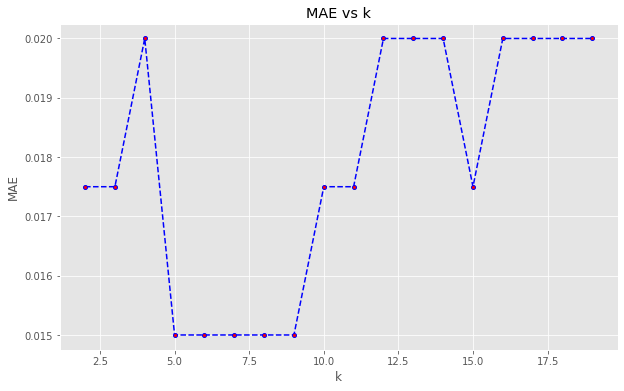



Value of k for which MAE is minimum :  2


In [45]:
k_min  = 2
test_error_rate = []
k_array = []
MAE = 2

for k in range(2,20):
    
    model = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled,y_train)
    predict_y = model.predict(X_test_scaled)
    y_true = y_test
    test_MAE = mean_absolute_error(y_true,predict_y)
    if test_MAE < MAE:
        MAE = test_MAE
        k1_min = k
    test_error_rate.append(test_MAE)
    k_array.append(k)
    
plt.figure(figsize=(10,6))
plt.plot(k_array,test_error_rate,'b',linestyle='dashed',marker='o',
         markerfacecolor='red', markersize=4)
plt.title('MAE vs k')
plt.xlabel('k')
plt.ylabel('MAE')
plt.show()
print('\n')
print("Value of k for which MAE is minimum : ",k_min)

WITH K=2

TP Rate :  0.96875
TN Rate :  1.0
FP Rate :  0.0
FN Rate :  0.03125
Success Rate:  0.9825
Misclassifiaction Rate:  0.0175
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       176
           1       1.00      0.97      0.98       224

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

KNN Test Accuracy :  98.25 %
Training Accuracy:  98.75 %


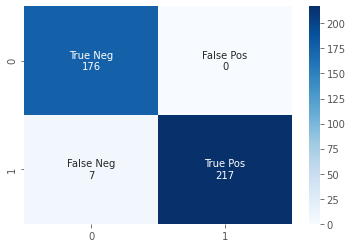

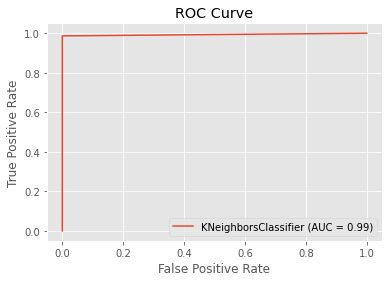

In [46]:
# NOW WITH K=2
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train_scaled,y_train)
pred_knn = knn.predict(X_test_scaled)

print('WITH K=2')
cm_knn = confusion_matrix(y_test, pred_knn)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_knn.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_knn,annot=labels,fmt='',cmap='Blues')
print()

TP_knn = cm_knn[1][1]
FP_knn = cm_knn[0][1]
FN_knn = cm_knn[1][0]
TN_knn = cm_knn[0][0] 

print('TP Rate : ',TP_knn / (TP_knn+FN_knn))
print('TN Rate : ', TN_knn/(FP_knn+TN_knn))
print('FP Rate : ', FP_knn/(FP_knn+TP_knn))
print('FN Rate : ', FN_knn/(FN_knn+TP_knn))
print('Success Rate: ', (TP_knn+TN_knn)/(TP_knn+FP_knn+FN_knn+TN_knn))
print('Misclassifiaction Rate: ', (FP_knn+FN_knn)/(TP_knn+FP_knn+FN_knn+TN_knn))

print(classification_report(y_test,pred_knn))

print('KNN Test Accuracy : ',accuracy_score(y_test, pred_knn)*100,'%')
print('Training Accuracy: ',accuracy_score(y_train, knn.predict(X_train_scaled))*100,'%')

metrics.plot_roc_curve(knn, X_test_scaled, y_test) 
plt.title('ROC Curve')
plt.show()




### 3. Support Vector Machines

/root/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


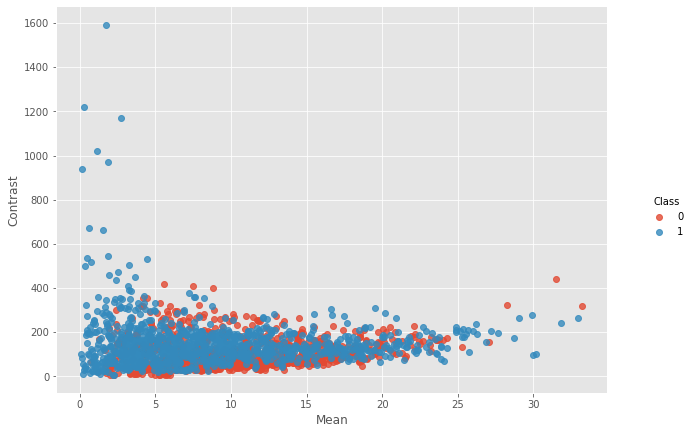

In [47]:
sns.lmplot('Mean', 'Contrast', df, hue='Class', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

### Using GridSearchCV for Hyperparameter Tuning for SVC

In [48]:
classifier=SVC()

parameters = [{'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7,
                     2.0,1, 10, 100, 1000], 'kernel': ['linear']},
              
              {'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7,
                     2.0,1, 10, 100, 1000], 'kernel': ['rbf'],
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
              
              {'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7,
                     2.0,1, 10, 100, 1000], 'kernel': ['poly']}]
kfold = KFold(n_splits=10, random_state=21,shuffle=True)
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = kfold,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_params_)

{'C': 100, 'gamma': 0.7, 'kernel': 'rbf'}



TP Rate :  0.9821428571428571
TN Rate :  0.9943181818181818
FP Rate :  0.004524886877828055
FN Rate :  0.017857142857142856
Success Rate:  0.9875
Misclassifiaction Rate:  0.0125
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       176
           1       1.00      0.98      0.99       224

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

SVC Test Accuracy :  98.75 %
Training Accuracy:  99.5625 %


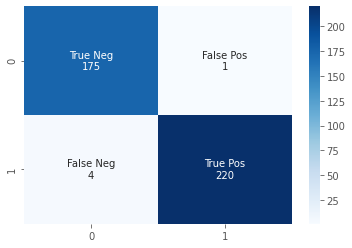

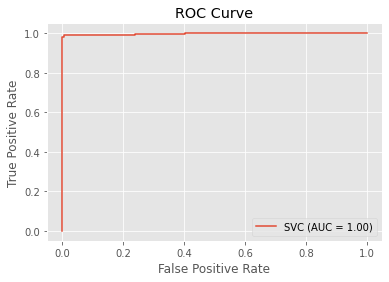

In [49]:
classifier_svc = SVC(kernel = 'rbf',C = 100,gamma=0.1)
classifier_svc.fit(X_train_scaled, y_train)
y_pred_svc = classifier_svc.predict(X_test_scaled)

cm_svc = confusion_matrix(y_test, y_pred_svc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_svc.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_svc,annot=labels,fmt='',cmap='Blues')
print()

TP_svc = cm_svc[1][1]
FP_svc = cm_svc[0][1]
FN_svc = cm_svc[1][0]
TN_svc = cm_svc[0][0] 

print('TP Rate : ',TP_svc / (TP_svc+FN_svc))
print('TN Rate : ', TN_svc/(FP_svc+TN_svc))
print('FP Rate : ', FP_svc/(FP_svc+TP_svc))
print('FN Rate : ', FN_svc/(FN_svc+TP_svc))
print('Success Rate: ', (TP_svc+TN_svc)/(TP_svc+FP_svc+FN_svc+TN_svc))
print('Misclassifiaction Rate: ', (FP_svc+FN_svc)/(TP_svc+FP_svc+FN_svc+TN_svc))

print(classification_report(y_test,y_pred_svc))

print('SVC Test Accuracy : ',accuracy_score(y_test, y_pred_svc)*100,'%')
print('Training Accuracy: ',accuracy_score(y_train, classifier_svc.predict(X_train_scaled))*100,'%')

metrics.plot_roc_curve(classifier_svc, X_test_scaled, y_test) 
plt.title('ROC Curve')
plt.show()

### 4. Building A Neural Network

There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

The number of hidden neurons should be between the size of the input layer and the size of the output layer.
The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
The number of hidden neurons should be less than twice the size of the input layer.

In [50]:
model = Sequential()

input_dim = X_train_scaled.shape[1]

#add input layer 
model.add(Dense(units =256, activation = 'relu', input_dim = input_dim))
model.add(Dropout(0.4))

# hidden layer
model.add(Dense(units =75,activation = 'relu'))
model.add(Dropout(0.4))

#output layer
model.add(Dense(units = 1, activation = 'sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer = opt , loss ='binary_crossentropy', metrics = ['accuracy'])

model_history = model.fit(X_train_scaled, y_train,validation_split=0.20, batch_size = 64, epochs = 50)

Epoch 1/50
20/20 [==============================] - 2s 25ms/step - loss: 0.6843 - accuracy: 0.5656 - val_loss: 0.6048 - val_accuracy: 0.8625
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5762 - accuracy: 0.8109 - val_loss: 0.5041 - val_accuracy: 0.9281
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4928 - accuracy: 0.8883 - val_loss: 0.4234 - val_accuracy: 0.9563
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4210 - accuracy: 0.9406 - val_loss: 0.3588 - val_accuracy: 0.9594
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.3611 - accuracy: 0.9500 - val_loss: 0.3061 - val_accuracy: 0.9656
Epoch 6/50
20/20 [==============================] - 0s 6ms/step - loss: 0.3180 - accuracy: 0.9539 - val_loss: 0.2627 - val_accuracy: 0.9656
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.2760 - accuracy: 0.9609 - val_loss: 0.2272 - val_accuracy: 0.9656
Epoch 8/50
20/20 [=


TP Rate :  0.9821428571428571
TN Rate :  0.9829545454545454
FP Rate :  0.013452914798206279
FN Rate :  0.017857142857142856
Success Rate:  0.9825
Misclassifiaction Rate:  0.0175
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       176
           1       0.99      0.98      0.98       224

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

Neural Network Test Accuracy :  98.25 %


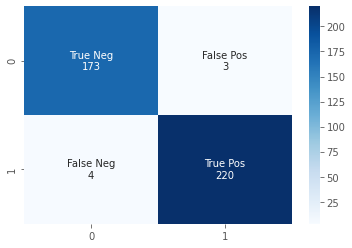

In [51]:
y_pred_nn = model.predict(X_test_scaled)
y_pred_nn = (y_pred_nn > 0.5)

cm_nn = confusion_matrix(y_test, y_pred_nn)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_nn.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_nn,annot=labels,fmt='',cmap='Blues')
print()


TP_nn = cm_nn[1][1]
FP_nn = cm_nn[0][1]
FN_nn = cm_nn[1][0]
TN_nn = cm_nn[0][0] 

print('TP Rate : ',TP_nn / (TP_nn+FN_nn))
print('TN Rate : ', TN_nn/(FP_nn+TN_nn))
print('FP Rate : ', FP_nn/(FP_nn+TP_nn))
print('FN Rate : ', FN_nn/(FN_nn+TP_nn))
print('Success Rate: ', (TP_nn+TN_nn)/(TP_nn+FP_nn+FN_nn+TN_nn))
print('Misclassifiaction Rate: ', (FP_nn+FN_nn)/(TP_nn+FP_nn+FN_nn+TN_nn))

print(classification_report(y_test,y_pred_nn))

print('Neural Network Test Accuracy : ',accuracy_score(y_test, y_pred_nn)*100,'%')


In [52]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


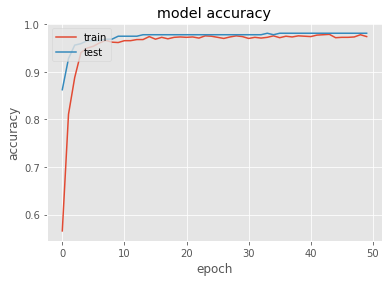

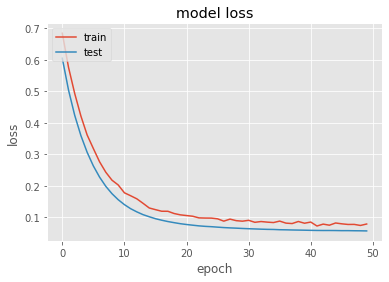

In [53]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 5. Decision Tree Classifier

In [54]:
tree = DecisionTreeClassifier(criterion='gini' ,random_state = 1)
tree.fit(X_train_scaled , y_train)
y_train_pred = tree.predict(X_train_scaled)
y_test_pred = tree.predict(X_test_scaled)

In [55]:
print(accuracy_score(y_train,y_train_pred) , round(accuracy_score(y_test,y_test_pred),2))

1.0 0.97


### Hyperparameter Tuning Using GridSearchCV


In [56]:
param_dist = {
    "criterion" : ["gini" , "entropy"] , 
    "max_depth" : [1,2,3,4,5,6,7,8,9,10,None] , 
    "min_samples_split" : [10,20,50,80,100,200,300,500]
}
kfold = KFold(n_splits=10, random_state=21,shuffle=True)
grid_dt = GridSearchCV(tree , param_grid = param_dist , cv=kfold , n_jobs=-1)
grid_dt.fit(X_train_scaled,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=21, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'min_samples_split': [10, 20, 50, 80, 100, 200, 300,
                                               500]})

In [57]:
grid_dt.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 10}

TP Rate :  0.9732142857142857
TN Rate :  0.9772727272727273
FP Rate :  0.018018018018018018
FN Rate :  0.026785714285714284
Success Rate:  0.975
Misclassifiaction Rate:  0.025
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       176
           1       0.98      0.97      0.98       224

    accuracy                           0.97       400
   macro avg       0.97      0.98      0.97       400
weighted avg       0.98      0.97      0.98       400

Decision Tree Test Accuracy :  97.5 %
Training Accuracy:  98.8125 %


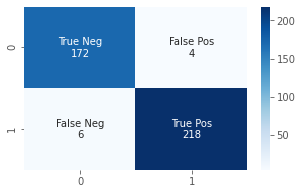

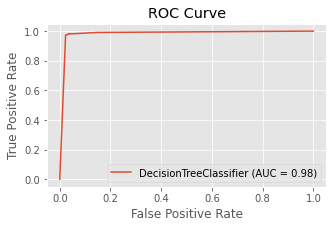

In [58]:
rcParams['figure.figsize'] = 5,3
tree2 = DecisionTreeClassifier(criterion='gini', max_depth= 6 , min_samples_split=10)
tree2.fit(X_train_scaled , y_train)
y_pred_dt = tree2.predict(X_test_scaled)

cm_dt = confusion_matrix(y_test, y_pred_dt)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_dt.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_dt,annot=labels,fmt='',cmap='Blues')

TP_dt = cm_dt[1][1]
FP_dt = cm_dt[0][1]
FN_dt = cm_dt[1][0]
TN_dt = cm_dt[0][0] 

print('TP Rate : ',TP_dt / (TP_dt+FN_dt))
print('TN Rate : ', TN_dt/(FP_dt+TN_dt))
print('FP Rate : ', FP_dt/(FP_dt+TP_dt))
print('FN Rate : ', FN_dt/(FN_dt+TP_dt))
print('Success Rate: ', (TP_dt+TN_dt)/(TP_dt+FP_dt+FN_dt+TN_dt))
print('Misclassifiaction Rate: ', (FP_dt+FN_dt)/(TP_dt+FP_dt+FN_dt+TN_dt))

print(classification_report(y_test,y_pred_dt))

print('Decision Tree Test Accuracy : ',accuracy_score(y_test, y_pred_dt)*100,'%')
print('Training Accuracy: ',accuracy_score(y_train, tree2.predict(X_train_scaled))*100,'%')

metrics.plot_roc_curve(tree2, X_test_scaled, y_test) 
plt.title('ROC Curve')
plt.show()

### 6. Tree Ensembles

### 6.1 Bagging

In [59]:
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    max_features=0.5,
    n_estimators=50,
    max_samples=0.5,
    bootstrap=True,
    oob_score=True,
)
bag.fit(X_train_scaled,y_train)
print('OOB Score without hyperparameter tuning : ',(bag.oob_score_)*100,'%')

OOB Score without hyperparameter tuning :  98.5 %


In [60]:
parameters = {
    'n_estimators': [50,100,500], 
    'max_samples': [0.1,0.2,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.2,0.4,0.7,1.0]
    }
kfold = KFold(n_splits=10, random_state=21,shuffle=True)
search = GridSearchCV(bag, parameters, cv=kfold,verbose = 1 , n_jobs=-1)
search.fit(X_train_scaled,y_train)
search.best_params_

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  3.4min finished


{'bootstrap': True,
 'max_features': 0.7,
 'max_samples': 0.7,
 'n_estimators': 50}

OOB Score with hyperparameter tuning :  98.1875 %

TP Rate :  0.9821428571428571
TN Rate :  0.9943181818181818
FP Rate :  0.004524886877828055
FN Rate :  0.017857142857142856
Success Rate:  0.9875
Misclassifiaction Rate:  0.0125
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       176
           1       1.00      0.98      0.99       224

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

Bagging Test Accuracy :  98.75 %
Training Accuracy:  100.0 %


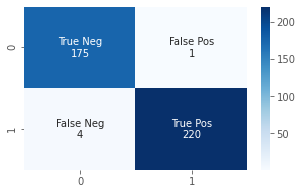

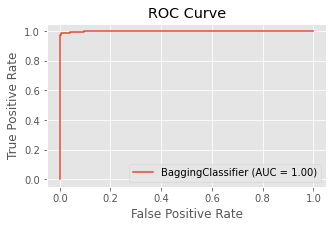

In [61]:
bag2 = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    max_features=0.4,
    n_estimators=500,
    max_samples=1.0,
    bootstrap=True,
    oob_score=True,
)

bag2.fit(X_train_scaled,y_train)
y_pred_bag = bag2.predict(X_test_scaled)
print('OOB Score with hyperparameter tuning : ',(bag2.oob_score_)*100,'%')

cm_bag = confusion_matrix(y_test, y_pred_bag)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_bag.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_bag,annot=labels,fmt='',cmap='Blues')
print()

TP_bag = cm_bag[1][1]
FP_bag = cm_bag[0][1]
FN_bag = cm_bag[1][0]
TN_bag = cm_bag[0][0] 

print('TP Rate : ',TP_bag / (TP_bag+FN_bag))
print('TN Rate : ', TN_bag/(FP_bag+TN_bag))
print('FP Rate : ', FP_bag/(FP_bag+TP_bag))
print('FN Rate : ', FN_bag/(FN_bag+TP_bag))
print('Success Rate: ', (TP_bag+TN_bag)/(TP_bag+FP_bag+FN_bag+TN_bag))
print('Misclassifiaction Rate: ', (FP_bag+FN_bag)/(TP_bag+FP_bag+FN_bag+TN_bag))

print(classification_report(y_test, y_pred_bag))

print('Bagging Test Accuracy : ',accuracy_score(y_test, y_pred_bag)*100,'%')
print('Training Accuracy: ',accuracy_score(y_train, bag2.predict(X_train_scaled))*100,'%')

metrics.plot_roc_curve(bag2, X_test_scaled, y_test) 
plt.title('ROC Curve')
plt.show()

### 6.2 Random Forest

In [62]:
rf = RandomForestClassifier(bootstrap = True ,
                            n_estimators = 50,
                            max_features = 0.5,
                            criterion='entropy', 
                            max_depth= None, 
                            min_samples_split=10)
rf.fit(X_train_scaled , y_train)
y_train_pred_rf = rf.predict(X_train_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)

print(accuracy_score(y_train,y_train_pred_rf)*100 , round(accuracy_score(y_test,y_test_pred_rf),2)*100)

99.4375 98.0


In [65]:
rf_params = {
    'n_estimators': [50,100,200],
    "max_depth": [1,2,3,4,5,6,7,8,9,10,None],
    "min_samples_split" : [10,20,50,80,100,200,300,500],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.2,0.4,0.7,1.0],
    'criterion' : ['gini','entropy']
    
}

search_rf = GridSearchCV(rf, rf_params, cv=5,verbose = 1 , n_jobs=-1)
search_rf.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 5280 candidates, totalling 26400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              max_features=0.5,
                                              min_samples_split=10,
                                              n_estimators=50),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': [0.1, 0.2, 0.4, 0.7, 1.0],
                         'min_samples_split': [10, 20, 50, 80, 100, 200, 300,
                                               500],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [66]:
search_rf.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.4,
 'min_samples_split': 10,
 'n_estimators': 200}


TP Rate :  0.9776785714285714
TN Rate :  0.9943181818181818
FP Rate :  0.004545454545454545
FN Rate :  0.022321428571428572
Success Rate:  0.985
Misclassifiaction Rate:  0.015
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       176
           1       1.00      0.98      0.99       224

    accuracy                           0.98       400
   macro avg       0.98      0.99      0.98       400
weighted avg       0.99      0.98      0.99       400

OOB Score with hyperparameter tuning :  98.375 %
Random Forest Test Accuracy :  98.5 %
Training Accuracy:  99.5625 %


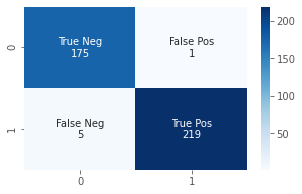

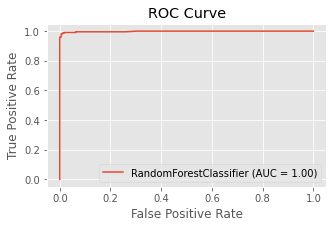

In [67]:
rf2 = RandomForestClassifier(bootstrap = True ,
                             oob_score=True,
                            n_estimators = 100,
                            max_features = 0.7,
                            criterion='entropy', 
                            max_depth= 9, 
                            min_samples_split=10)
rf2.fit(X_train_scaled , y_train)
y_train_pred_rf2 = rf2.predict(X_train_scaled)
y_test_pred_rf2 = rf2.predict(X_test_scaled)

cm_rf = confusion_matrix(y_test, y_test_pred_rf2)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_rf.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_rf,annot=labels,fmt='',cmap='Blues')
print()

TP_rf = cm_rf[1][1]
FP_rf = cm_rf[0][1]
FN_rf = cm_rf[1][0]
TN_rf = cm_rf[0][0] 

print('TP Rate : ',TP_rf / (TP_rf+FN_rf))
print('TN Rate : ', TN_rf/(FP_rf+TN_rf))
print('FP Rate : ', FP_rf/(FP_rf+TP_rf))
print('FN Rate : ', FN_rf/(FN_rf+TP_rf))
print('Success Rate: ', (TP_rf+TN_rf)/(TP_rf+FP_rf+FN_rf+TN_rf))
print('Misclassifiaction Rate: ', (FP_rf+FN_rf)/(TP_rf+FP_rf+FN_rf+TN_rf))

print(classification_report(y_test, y_test_pred_rf2))

print('OOB Score with hyperparameter tuning : ',(rf2.oob_score_)*100,'%')
print('Random Forest Test Accuracy : ',accuracy_score(y_test, y_test_pred_rf2)*100,'%')
print('Training Accuracy: ',accuracy_score(y_train, rf2.predict(X_train_scaled))*100,'%')

metrics.plot_roc_curve(rf2, X_test_scaled, y_test) 
plt.title('ROC Curve')
plt.show()

### 6.3 Boosting

#### 6.3.1 AdaBoost

In [68]:
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100, random_state=42)
ada.fit(X_train_scaled,y_train)

print (f'Train Accuracy - : {ada.score(X_train_scaled,y_train):.3f}')
print (f'Test Accuracy - : {ada.score(X_test_scaled,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.970


In [69]:
ada_params = {
    'n_estimators': [50,100,200],
    'learning_rate' : [0.1,0.01,0.001,0.2,0.3,0.4,0.5],
    'random_state' : [0,20,40]
    }
kfold = KFold(n_splits=10, random_state=21,shuffle=True)
ada_cv = RandomizedSearchCV(ada, ada_params, cv=kfold , verbose=1,n_jobs=-1)
ada_cv.fit(X_train_scaled,y_train)
print(ada_cv.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'random_state': 40, 'n_estimators': 200, 'learning_rate': 0.2}


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished



TP Rate :  0.9821428571428571
TN Rate :  0.9659090909090909
FP Rate :  0.02654867256637168
FN Rate :  0.017857142857142856
Success Rate:  0.975
Misclassifiaction Rate:  0.025
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       176
           1       0.97      0.98      0.98       224

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.97       400

Random Forest Test Accuracy :  97.5 %
Training Accuracy:  100.0 %


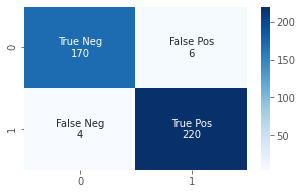

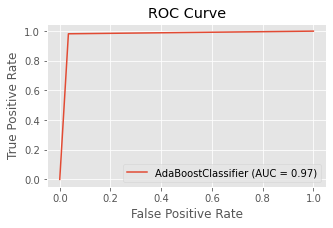

In [70]:
ada2 = AdaBoostClassifier(ada,n_estimators=200, random_state=0,learning_rate=0.5)
ada2.fit(X_train_scaled,y_train)
y_pred_ada = ada2.predict(X_test_scaled)
cm_ab = confusion_matrix(y_test, y_pred_ada)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_ab.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_ab,annot=labels,fmt='',cmap='Blues')
print()

TP_ab = cm_ab[1][1]
FP_ab = cm_ab[0][1]
FN_ab = cm_ab[1][0]
TN_ab = cm_ab[0][0] 

print('TP Rate : ',TP_ab / (TP_ab+FN_ab))
print('TN Rate : ', TN_ab/(FP_ab+TN_ab))
print('FP Rate : ', FP_ab/(FP_ab+TP_ab))
print('FN Rate : ', FN_ab/(FN_ab+TP_ab))
print('Success Rate: ', (TP_ab+TN_ab)/(TP_ab+FP_ab+FN_ab+TN_ab))
print('Misclassifiaction Rate: ', (FP_ab+FN_ab)/(TP_ab+FP_ab+FN_ab+TN_ab))
print(classification_report(y_test, y_pred_ada))

print('Random Forest Test Accuracy : ',accuracy_score(y_test, y_pred_ada)*100,'%')
print('Training Accuracy: ',accuracy_score(y_train, ada2.predict(X_train_scaled))*100,'%')

metrics.plot_roc_curve(ada2, X_test_scaled, y_test) 
plt.title('ROC Curve')
plt.show()

### 7. Logistic Regression

In [71]:
lr_clf = LogisticRegression()

param_grid = {
    'penalty' : ['l1' , 'l2'],
    'C' : [1,10,100,0.1,0.01,0.001]
}
grid_lr_clf = GridSearchCV(estimator=lr_clf,param_grid=param_grid,scoring='accuracy',verbose=1,n_jobs=-1,cv=kfold)
grid_lr_clf.fit(X_train_scaled,y_train)

grid_lr_clf.best_params_

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.7s finished


{'C': 10, 'penalty': 'l2'}


TP Rate :  0.9910714285714286
TN Rate :  0.9829545454545454
FP Rate :  0.013333333333333334
FN Rate :  0.008928571428571428
Success Rate:  0.9875
Misclassifiaction Rate:  0.0125
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       176
           1       0.99      0.99      0.99       224

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

Logistic Regression Test Accuracy :  98.75 %
Training Accuracy:  98.375 %


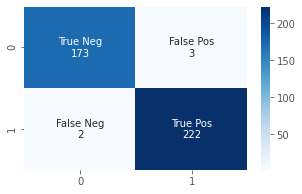

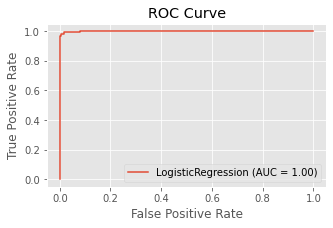

In [72]:
lr_clf2 = LogisticRegression(C = 10 , penalty='l2',random_state=0)
lr_clf2.fit(X_train_scaled,y_train)
y_pred_lr = lr_clf2.predict(X_test_scaled)

cm_lr = confusion_matrix(y_test, y_pred_lr)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_lr.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lr,annot=labels,fmt='',cmap='Blues')
print()

TP_lr = cm_lr[1][1]
FP_lr = cm_lr[0][1]
FN_lr = cm_lr[1][0]
TN_lr = cm_lr[0][0] 

print('TP Rate : ',TP_lr / (TP_lr+FN_lr))
print('TN Rate : ', TN_lr/(FP_lr+TN_lr))
print('FP Rate : ', FP_lr/(FP_lr+TP_lr))
print('FN Rate : ', FN_lr/(FN_lr+TP_lr))
print('Success Rate: ', (TP_lr+TN_lr)/(TP_lr+FP_lr+FN_lr+TN_lr))
print('Misclassifiaction Rate: ', (FP_lr+FN_lr)/(TP_lr+FP_lr+FN_lr+TN_lr))

print(classification_report(y_test, y_pred_lr))


print('Logistic Regression Test Accuracy : ',accuracy_score(y_test, y_pred_lr)*100,'%')
print('Training Accuracy: ',accuracy_score(y_train, lr_clf2.predict(X_train_scaled))*100,'%')

metrics.plot_roc_curve(lr_clf2, X_test_scaled, y_test) 
plt.title('ROC Curve')
plt.show()

In [73]:
y_pred_prob = lr_clf2.predict_proba(X_test_scaled)[0:10]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Non-Tumor (0)', 'Tumor (1)'])

y_pred_prob_df.head()

,Non-Tumor (0),Tumor (1)
0,9.998530e-01,0.000147
1,7.862644e-04,0.999214
2,3.993410e-08,1.000000
3,2.222902e-08,1.000000
4,5.100249e-10,1.000000


Text(0, 0.5, 'Frequency')

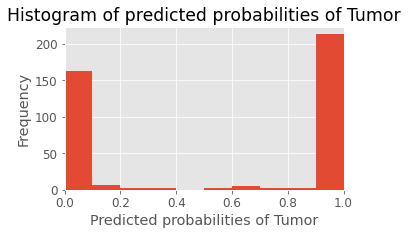

In [74]:
y_pred1 = lr_clf2.predict_proba(X_test_scaled)[:, 1]
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)

plt.title('Histogram of predicted probabilities of Tumor')

plt.xlim(0,1)

plt.xlabel('Predicted probabilities of Tumor')
plt.ylabel('Frequency')